<img src="img/decisionmaking.png" width="400">

# ELEC-E7890 - User Research
# Lecture 10 - User Modeling

**Aurélien Nioche**

Aalto University

## Preamble

<img src="img/netflix.png" width="900">

<img src="img/diagram.jpeg" width="1000">

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left">&nbsp;Learning objectives</h2>
    <br>Learn by a basic example the elementary rules of decision making modeling, including:
    <ul>
        <li>How to design task and models (see <a href="#1.-Task-Model-&-Decision-Making-Models" class="alert-link">Section 1</a>);
        <li>How to conduct exploratory simulations and  (see <a href="#2.-Exploratory-Simulations" class="alert-link">Section 2</a>);
        <li>How to fit your models on experimental data and be confident that you can recover the best parameters (see <a href="#3.-Parameter-Fitting-&amp;-Parameter-Recovery" class="alert-link">Section 3</a>);
        <li>How to compare the quality of your models given data and be confident that you can recover the best model (see <a href="#4.-Model-Comparison-&amp;-Model-Recovery" class="alert-link">Section 4</a>);
        <li>How to simulate your experimental results in preparation of a 'real' experiment (see <a href="#5.-Artificial-Experiment" class="alert-link">Section 5</a>);
    </ul>
</div>

## Course Overview

<h3><img src="img/design.png" width="30" align="left">&nbsp;&nbsp;&nbsp;&nbsp;
    <a href="#S1">1. Task Model &amp; Decision Making Models</a></h3>

<a href="#S1.1">1.1 Task definition</a>

<a href="#S1.2">1.2 Models definition</a>


<h3><img src="img/simulation.jpg" width="50" align="left">&nbsp;
    <a href="#S2">2. Exploratory Simulations</a></h3>

<a href="#S2.1">2.1 Simulate a single agent</a>

<a href="#S2.2">2.2 Analyse latent variables</a>

<a href="#S2.3">2.3 Simulate a population of homogeneous agents</a>

<a href="#S2.4">2.4 Represent the effect of the free parameters on behavior</a>

<h3><img src="img/optimization.jpeg" width="50" align="left">&nbsp;
    <a href="#S3">3. Parameter Fitting &amp; Parameter Recovery</a></h3>

<a href="#S3.1">3.1 Define a likelihood function</a>

<a href="#S3.2">3.2 Choose a way to search for the best parameters</a>

<a href="#S3.3">3.3 Try with a single agent</a>

<a href="#S3.4">3.4 Explore the behavior of the likelihood function over parameter space</a>

<a href="#S3.5">3.5 Try with a homogeneous population</a>

<a href="#S3.6">3.6 Systematize the process</a>

<h3><img src="img/competition.png" width="50" align="left">&nbsp;
    <a href="#S4">4. Model Comparison &amp; Model Recovery</a></h3>

<a href="#S4.1">4.1 Choose a metric</a>
    
<a href="#S4.2">4.2 Try with a single agent</a>

<a href="#S4.3">4.3 Systematize the approach</a>

<h3><img src="img/experiment.jpg" width="30" align="left">&nbsp;&nbsp;&nbsp;&nbsp;
    <a href="#S5">5. Artificial Experiment</a></h3>

<a href="#S5.1">5.1 Generate data</a>

<a href="#S5.2">5.2 Compare the models</a>

<a href="#S5.3">5.3 Study the distribution of your best-fit parameters</a>

<a href="#S5.4">5.4 Simulate with the best-fit parameters</a>

<a href="#CR">Conclusive Remarks and a Few Take Aways</a>

<a href="#AM">Additional material</a>


---
### Note

This lecture is greatly inspired by <a href="https://www.ocf.berkeley.edu/~acollins/pdfs/papers/WilsonCollins_modelFitting.pdf" >Wilson &amp; Collins (2019) </a>.

## 1. Task Model & Decision Making Models<a id="S1"></a>
<a href="#Course-Overview">Course Overview</a>

<img src="img/design.png" width="300">

<div class="alert alert-block alert-success">
<h3><img src="img/logo/goal.png" width="20" align="left">&nbsp;Section Goal</h3>
<ul>
    <li>Design the task that will allow you to answer your research question;
    <li> Design the decision making models that you want to put in competition.
    </ul>
</div>

### 1.1 Task definition<a id="S1.1"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Define a task that allow you to answer your research question;
        <li>Select adequate characteristics (i.e., enough time-steps).
    </ul>
</div>

<img src="img/logo/how_to.png" width="25" align="left">&nbsp;**How to do it?**

Let's take as example:

<img src="img/illustration.jpeg" width="700">

**Question**: "How do people learn the probabilities of rewards given a pool of options?"

<b>Task: <a href="https://en.wikipedia.org/wiki/Multi-armed_bandit">Bandit task</a></b>

<img src="img/multiarmedbandit.jpg" width="200">

Parameters: 
* Number of option ($N$)
* Distribution of probability over these options ($\{p_{\text{reward}}(i)\}_{i\in N}$)
* Number of trials ($T$)


*Note: In lecture 7, you studied how to solve the bandit problem programmatically aiming for the most optimal result. In this class, we don't aim for optimality but seek to understand how humans solve this type of problem.*

In [1]:
import os
import numpy as np
import scipy.optimize
import scipy.stats
from itertools import product
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import statsmodels.stats
import statsmodels.stats.proportion
from IPython.display import display

In [2]:
# Define a folder for the bkp
BKP_FOLDER = "bkp"

# Create this folder if it doesn't exist
os.makedirs(BKP_FOLDER, exist_ok=True)

In [3]:
# Define the parameters of the bandit task
N = 2
P = np.array([0.5, 0.75])
T = 500

### 1.2 Models definition<a id="S1.2"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Model alternative hypotheses regarding the underlying decision making process.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

Here, we will consider that each agent has the opportunity at each $t\in T$ to:
<ul>
    <li>Choose: we will define for each model a "decision rule", more precisely, we model a probability distribution over the action choices such as:
\begin{equation}
\forall i: p_{\text{choice}}(i) \in [0, 1] \wedge \sum_{i}^N p_{\text{choice}}(i) = 1
\end{equation}
</ul>
<ul>
    <li>Learn: we will define for each model an "updating rule".
</ul>

In [4]:
class GenericPlayer:
    
    """
    Generic Player
    """
    
    param_labels = ()
    fit_bounds = ()

    def __init__(self):
        self.options = np.arange(N)
        
    def decision_rule(self):
        raise NotImplementedError

    def learning_rule(self, option, success):
        raise NotImplementedError
        
    def choose(self):
        p = self.decision_rule()
        return np.random.choice(self.options, p=p)

On this basis, we can define all of our models. Let's begin as simple as possible:


**M1. Random selection**

<img src="img/coin.png" width="200">

* Decision rule:

\begin{equation}
p_{\text{choice}}(i) = 1/N
\end{equation}

In [5]:
class Random(GenericPlayer):
    
    """
    Random selection
    """

    def __init__(self):
        super().__init__()

    def decision_rule(self):
        return np.ones(N) / N
    
    def learning_rule(self, option, success):
        pass

<b>M2. <a href="https://en.wikipedia.org/wiki/Win%E2%80%93stay,_lose%E2%80%93switch">Win-Stay-Lose-Switch</a> (Noisy variant)</b>

<img src="img/wsls.png" width="200">

<ul>
    <li>Decision rule ($\epsilon$)
<ul>
\begin{equation}
p_{\text{choice}}(i) = 
\begin{cases}
1 - \epsilon + \epsilon / N & \text{if } r_{t-1} = 1 \wedge c_{t-1} = i,\\
\frac{1 - \epsilon}{N-1} + \epsilon / N & \text{if } r_{t-1} = 0 \wedge c_{t-1} \neq i\\
\epsilon / N & \text{otherwise.}\\
\end{cases}
\end{equation}

where $\epsilon \in [0, 1]$ is a free parameter describing the probability to choose randomly instead of applying the "Win-Stay-Lose-Switch' rule.

In [6]:
class WSLS(GenericPlayer):
    """
    Win-Stay-Lose-Switch
    """

    param_labels = "epsilon",
    fit_bounds = (0., 1),

    def __init__(self, epsilon):
        super().__init__()
        self.epsilon = epsilon

        self.c = -1
        self.r = -1

    def decision_rule(self):

        if self.c == -1:
            return np.ones(N) / N  # First turn

        p = np.zeros(N)

        p_apply_rule = 1 - self.epsilon # 1 - epsilon: apply the rule
        p_random = self.epsilon / N # epsilon: pick up randomly
        if self.r:
            p[self.options != self.c] = p_random
            p[self.c] = 1 - np.sum(p)  # p_apply_rule + p_random
        else:
            p[self.options != self.c] = p_apply_rule / (N - 1) + p_random
            p[self.c] = 1 - np.sum(p)  # p_random

        return p

    def learning_rule(self, option, success):
        self.r = success
        self.c = option

<b>M3. <a href="https://en.wikipedia.org/wiki/Rescorla%E2%80%93Wagner_model">Rescorla-Wagner</a></b>

<img src="img/rl_illustration.jpeg" width=400>

<ul>
    <li>Updating rule ($\alpha$)
</ul>

\begin{equation}
Q^{t+1}(i) = Q^t(i) + \alpha [s - Q^t(i)]
\end{equation}

where:

<ul>
    <li> $s=1$ in case of success, 0 otherwise;
    <li> $\alpha \in [0, 1]$ is a free parameter describing to which extent a new success/failure will impact the $Q$-values.
</ul>

<img src="img/learning_curve.png" width="200">


---

<img src="img/exploration_vs_exploitation.png" width="300">

<ul>
    <li>Decision rule ($\beta$)
</ul>

\begin{equation}
p_{\text{choice}}(i) = \dfrac{e^{\beta Q(i)}}{\sum_{j \in N} e^{\beta Q(j)}} 
\end{equation}

where $\beta \in [0, \infty]$ is a free parameter describing the stochasticity of the choice: the greater $\beta$ is, the more the $Q$-values will impact the probability distribution.

<img src="img/sigmoid.png" width="200">

In [7]:
class RW(GenericPlayer):
    """
    Rescorla-Wagner
    """

    param_labels = r"$\alpha$", r"$\beta$",
    fit_bounds = (0.0, 1.0), (1.0, 20.0),

    def __init__(self, q_alpha, q_beta, initial_value=0.5):
        super().__init__()
        self.q_values = np.full(N, initial_value)
        self.q_alpha = q_alpha
        self.q_beta = q_beta

    def decision_rule(self):
        
        num = np.exp(self.q_beta * self.q_values)
        denom = np.sum(num)
        p_soft = num / denom
        return p_soft

    def learning_rule(self, option, success):
        err = success - self.q_values[option]
        self.q_values[option] += self.q_alpha * err 

<img src="img/status_quo.jpg" width=400>

**M4. Rescorla-Wagner-Choice-Kernel**

<ul>
    <li>Updating rule ($\alpha_q$, $\alpha_c$)
</ul>

\begin{align}
Q^{t+1}(i) &= Q^t(i) + \alpha_q[s - Q^t(i)] \\
C^{t+1}(i) &= C^t(i) + \alpha_c[a^t(i) - C^t(i)] \\
\end{align}

where:

<ul><ul>
    <li> $s=1$ in case of success, 0 otherwise;
    <li> $a^t(i) = 1$ if option $i$ selected at time $t$ else 0; 
    <li> $\alpha_q \in [0, 1]$ is a free parameter describing to which extent a new success/failure will impact the $Q$-values;
   <li> $\alpha_c \in [0, 1]$ is a free parameter describing to which extent the action selected at $t$ will impact the $C$-values.
            </ul></ul>
<br>

<ul>
    <li>Decision rule ($\beta_q$, $\beta_c$)
</ul>
        
\begin{equation}
p_{\text{choice}}(i) = \dfrac{e^{\beta_q Q(i)+ \beta_c C(i)}}{\sum_{j \in N} 
e^{\beta_q Q(j)+ \beta_c C(j)}} 
\end{equation}

where:
    
<ul><ul>
    <li> $\beta_q \in [0, \infty]$ is a free parameter describing the stochasticity of the choice: the greater $\beta_q$ is, the more the $Q$-values will impact the probability distribution;
    <li> $\beta_c \in [0, \infty]$ is a free parameter describing the 'choice stickiness': the greater $\beta_c$ is, the more the $C$-values will impact the probability distribution.</li>
    </ul></ul>
<br>
<br>

*Note: The implementation follows the description given by <a href="https://www.ocf.berkeley.edu/~acollins/pdfs/papers/WilsonCollins_modelFitting.pdf" >Wilson & Collins (2019) </a>.*

In [8]:
class RWCK(RW):

    """
    Rescorla-Wagner-Choice-Kernel
    """

    param_labels = ("alpha_q", "beta_q", "alpha_c", "beta_c")
    fit_bounds = (0.0, 1), (1.0, 20.0), (0.0, 1), (1.0, 20.0)

    def __init__(self,  q_alpha, q_beta, c_alpha, c_beta):

        super().__init__(q_alpha=q_alpha, q_beta=q_beta)
        self.c_alpha = c_alpha
        self.c_beta = c_beta
        self.c_values = np.zeros(N)

    def decision_rule(self):
        
        num = np.exp(self.q_beta * self.q_values 
                     + self.c_beta * self.c_values)
        denom = np.sum(num)
        p_soft = num / denom
        return p_soft

    def learning_rule(self, option, success):

        a = np.zeros(N, dtype=int)
        a[option] = 1

        self.c_values[:] += self.c_alpha * (a - self.c_values[:])

        super().learning_rule(option=option, success=success)

## 2. Exploratory Simulations<a id="S2"></a>
<a href="#Course-Overview">Course Overview</a>

<img src="img/simulation.jpg" width="300">

<div class="alert alert-block alert-danger">
<h3><img src="img/logo/warning.png" width="20" align="left">&nbsp;Warning</h3>
    <br>We will describe the procedure only for Rescorla-Wagner, but it should done for <b>all</b> the models in competition.</div>
    
<div class="alert alert-block alert-success">
<h3><img src="img/logo/goal.png" width="20" align="left">&nbsp;Section Goal</h3>
<ul>
    <li>'Play' with your models;
    <li> Be sure that you obtain (at least under some conditions) what you want to model;
    <li> Have a general overview of what your results could look like.
    </ul>
</div>

### 2.1 Simulate a single agent<a id="S2.1"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Have a first insight into your model's behavior.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

In [9]:
def run_simulation(model, param):

    # Create the agent
    agent = model(*param)

    # Data containers
    choices = np.zeros(T, dtype=int)
    successes = np.zeros(T, dtype=bool)

    # Simulate the task
    for t in range(T):

        # Determine choice
        choice = agent.choose()

        # Determine success
        success = P[choice] > np.random.random()

        # Make agent learn
        agent.learning_rule(option=choice, success=success)

        # Backup
        choices[t] = choice
        successes[t] = success

    return pd.DataFrame({
        "time": np.arange(T),
        "choice": choices, 
        "success": successes})


# Seed the pseudo-random number generator
np.random.seed(0)

# We will experiment with Rescola-Wagner
model = RW

# Get data
param_single = np.array([0.10, 10.00])
bhv_single = run_simulation(model=model, param=param_single)

# Backup
bhv_single.to_csv(os.path.join(BKP_FOLDER, "bhv_single.csv"))

In [10]:
# Load the data
bhv_single = pd.read_csv(os.path.join(BKP_FOLDER, "bhv_single.csv"), 
                         index_col=[0])
# Print...
display(bhv_single)

,time,choice,success
0,0,1,True
1,1,1,True
2,2,1,True
3,3,1,False
4,4,1,True
...,...,...,...
495,495,0,True
496,496,0,False
497,497,1,True
498,498,1,False


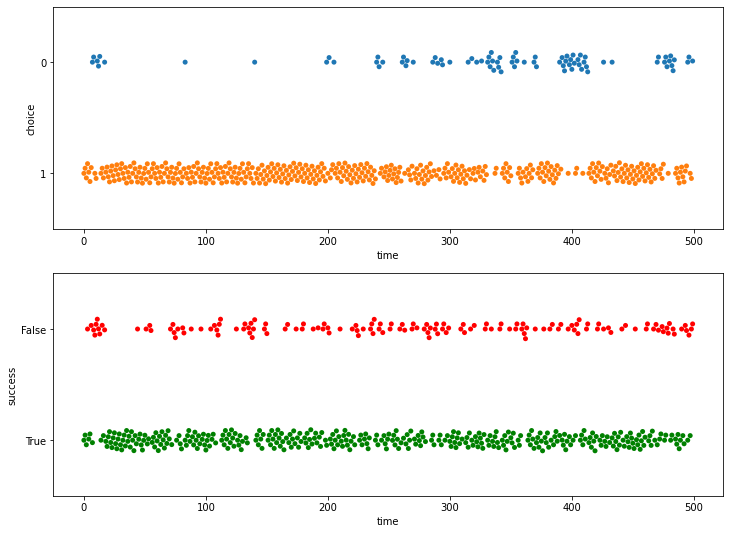

In [11]:
# Create figure and axes
fig, axes = plt.subplots(nrows=2, figsize=(12, 9))

# Show choices
sns.swarmplot(data=bhv_single, x='time', y='choice', ax=axes[0], orient="h")

# Show success
sns.swarmplot(data=bhv_single, x='time', y='success',
              ax=axes[1], palette={True: "green", False: "red"}, orient="h")

plt.show()

### 2.2 Analyse latent variables<a id="S2.2"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Observe the dynamics of your model.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

In [12]:
def latent_variables_rw(bhv_data, param):

    """
    Specific to RW
    """

    # Create the agent
    agent = RW(*param)

    # Data container
    row_list = []

    # (Re-)Simulate the task
    for t in range(T):
        
        # Get the q-values and probabilites of each choice
        q = agent.q_values
        p = agent.decision_rule()
        
        # For each option...
        for i in range(N):
            # Backup
            row_list.append({
                "time": t,
                "option": i,
                "q": q[i],
                "p": p[i]})

        # Make agent learn
        agent.learning_rule(option=bhv_data.choice[t],
                            success=bhv_data.success[t])
    
    # Return results as a DataFrame
    return pd.DataFrame(row_list)


# Get the data
lv_single = latent_variables_rw(bhv_data=bhv_single, param=param_single)

# Print...
display(lv_single)

,time,option,q,p
0,0,0,0.500000,0.500000
1,0,1,0.500000,0.500000
2,1,0,0.500000,0.377541
3,1,1,0.550000,0.622459
4,2,0,0.500000,0.278885
...,...,...,...,...
995,497,1,0.586479,0.729430
996,498,0,0.487305,0.196983
997,498,1,0.627831,0.803017
998,499,0,0.487305,0.314875


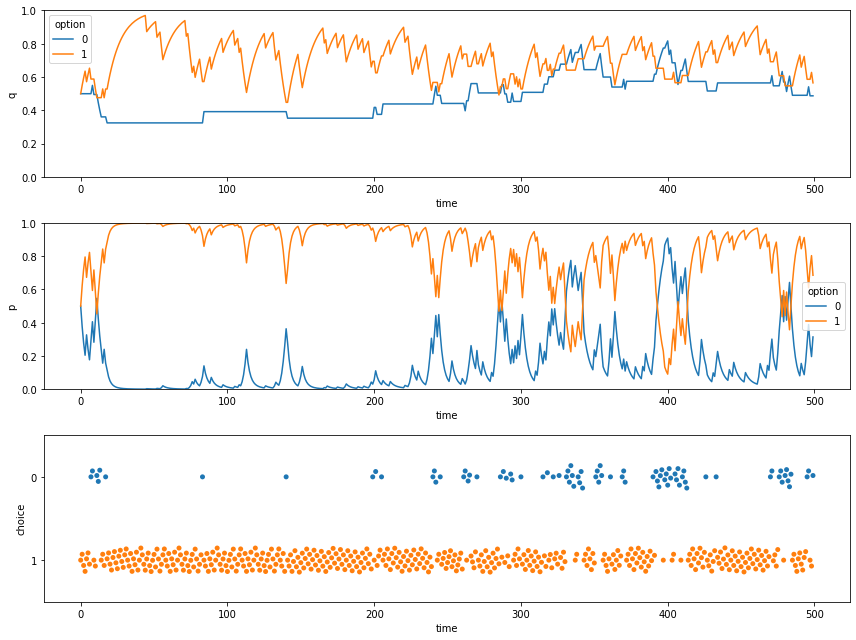

In [13]:
# Plot
fig, axes = plt.subplots(nrows=3, figsize=(12, 9))

# Show the q-values
sns.lineplot(data=lv_single, x="time", y="q", hue="option", ax=axes[0])

# Show the probabilities of choice
sns.lineplot(data=lv_single, x="time", y="p", hue="option", ax=axes[1])

# Set the limits of the y-axis
for ax in axes[:2]:
    ax.set_ylim(0, 1)

# Show the choices
sns.swarmplot(data=bhv_single, x='time', y='choice', orient="h", ax=axes[2])

plt.tight_layout()
plt.show()

### 2.3 Simulate a population of homogeneous agents<a id="S2.3"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Evaluate the 'noise' of your behavior by using constant parametrisation;
        <li>Get a picture of your expected behavior under the best scenario 
(you find the best model, and subjects share the same best parameters).
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

- Maintain constant the parameters that you are using (except the seed of your pseudo-random number generator)

In [14]:
def run_sim_pop(model, param):

    # Data container (will contain one dataframe for each subject)
    frames = []

    for i, pr in tqdm(enumerate(param), total=len(param), file=sys.stdout):

        # Get choices and successes
        d = run_simulation(model=model, param=pr)
        
        # Add a 'id' column to identify each subject
        d["id"] = i
        
        # Backup
        frames.append(d)
    
    # Return a unique dataframe
    return pd.concat(frames)


def latent_variables_rw_pop(bhv_data, param):

    """
    Specific to RW
    """
    
    # Get one dataframe per subject
    frames_bhv = [x for _, x in bhv_data.groupby("id")]

    # Data containers
    frames = []
    
    # For each subject's dataframe...
    for bhv, pr in zip(frames_bhv, param):

        # Get q-values and choice probabilities
        d = latent_variables_rw(bhv, param=pr)
        
        # Add a 'id' column to identify each subject
        d["id"] = bhv["id"][0]
        
        # Backup
        frames.append(d)
    
    # Return a unique dataframe
    return pd.concat(frames)

In [15]:
# Seed the pseudo-random number generator
np.random.seed(0)

# Set the number of subjects and model to use
n = 30
model = RW

# Set the parameters
param_hom_pop = [param_single for _ in range(n)]

# Get the behavioral data
bhv_hom_pop = run_sim_pop(model=model, param=param_hom_pop)

# Print...
display(bhv_hom_pop)

100%|██████████| 30/30 [00:00<00:00, 40.79it/s]


,time,choice,success,id
0,0,1,True,0
1,1,1,True,0
2,2,1,True,0
3,3,1,False,0
4,4,1,True,0
...,...,...,...,...
495,495,1,False,29
496,496,1,True,29
497,497,1,True,29
498,498,1,False,29


In [16]:
# Get the latent variable
lv_hom_pop = latent_variables_rw_pop(bhv_hom_pop, param=param_hom_pop)

# Print...
display(lv_hom_pop)

,time,option,q,p,id
0,0,0,0.500000,0.500000,0
1,0,1,0.500000,0.500000,0
2,1,0,0.500000,0.377541,0
3,1,1,0.550000,0.622459,0
4,2,0,0.500000,0.278885,0
...,...,...,...,...,...
995,497,1,0.765459,0.986340,29
996,498,0,0.337508,0.010835,29
997,498,1,0.788913,0.989165,29
998,499,0,0.337508,0.023542,29


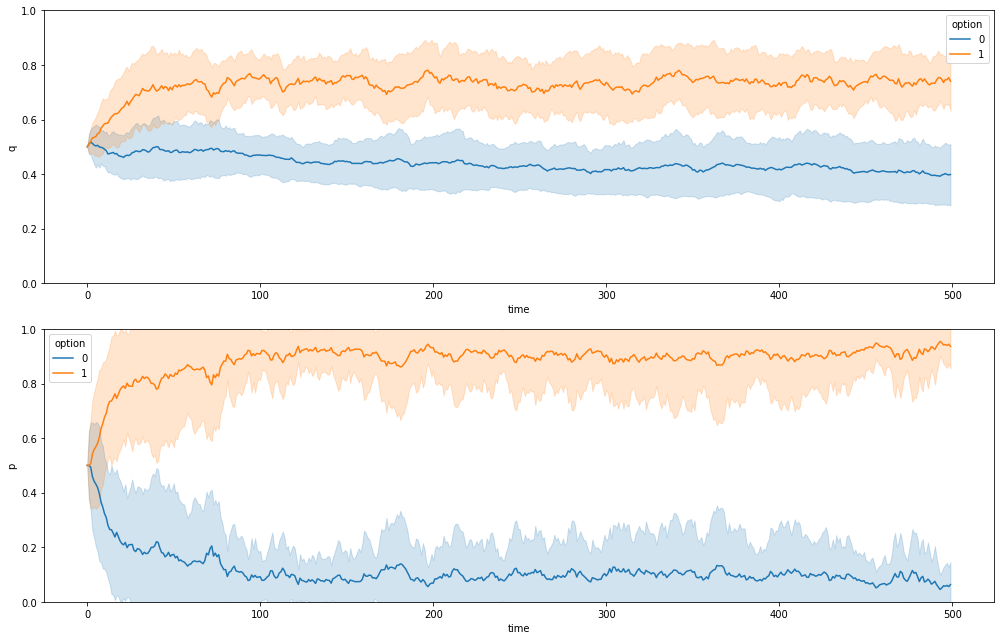

In [17]:
# Plot
fig, axes = plt.subplots(nrows=2, figsize=(14, 9))

# Plot the q-values
sns.lineplot(data=lv_hom_pop, x="time", y="q", hue="option", ax=axes[0], ci="sd")

# Plot the p-values
sns.lineplot(data=lv_hom_pop, x="time", y="p", hue="option", ax=axes[1], ci="sd")

# Set the limits of the y-axis 
for ax in axes[:2]:
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

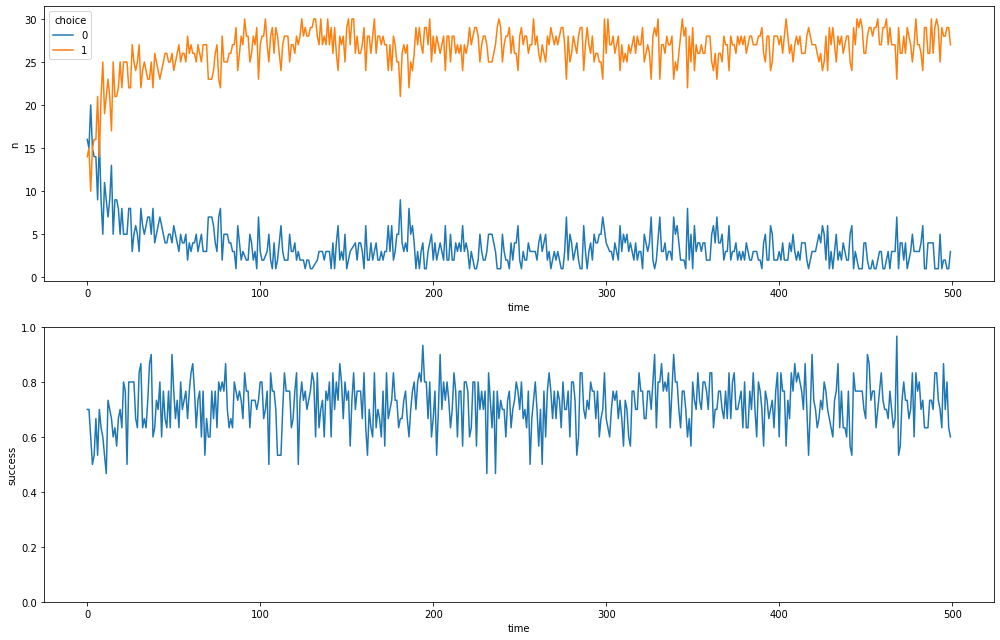

In [18]:
# Plot
fig, axes = plt.subplots(nrows=2, figsize=(14, 9))

# Plot the choices
rep_choice = bhv_hom_pop.groupby(['time', 'choice']).size().to_frame('n').reset_index()
sns.lineplot(data=rep_choice, x="time", y="n", hue="choice", ax=axes[0])

# Plot the successes
sns.lineplot(data=bhv_hom_pop, x="time", y="success", ax=axes[1], ci=None)

# Set the limits of the y-axis
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### 2.4 Represent the effect of the free parameters on behavior<a id="S2.4"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Isolate the effect of each parameter.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

In our case, we can:
* Represent the q-values over time for different learning rates ($\alpha$)

In [19]:
# Set the number of iteration
n_iteration=100

# Define a set of values to test
alpha_list = (0.01, 0.1, 0.2, 0.3)

# Results container
row_list = []

# For each alpha-value in the list...
for alpha in alpha_list:
    
    # Generate an agent
    agent = RW(q_alpha=alpha, q_beta=None)
    
    # For each iteration...
    for t in range(n_iteration):

        # Get the q-value for option 0
        q0 = agent.q_values[0]
        
        # Backup
        row_list.append({
            r"$\alpha$": alpha,
            "time": t,
            "q": q0
        })
        
        # Reinforce this option
        agent.learning_rule(option=0, success=1)

# Create a dataframe
df_alpha = pd.DataFrame(row_list)

# Print...
display(df_alpha)

,$\alpha$,time,q
0,0.01,0,0.500000
1,0.01,1,0.505000
2,0.01,2,0.509950
3,0.01,3,0.514850
4,0.01,4,0.519702
...,...,...,...
395,0.30,95,1.000000
396,0.30,96,1.000000
397,0.30,97,1.000000
398,0.30,98,1.000000


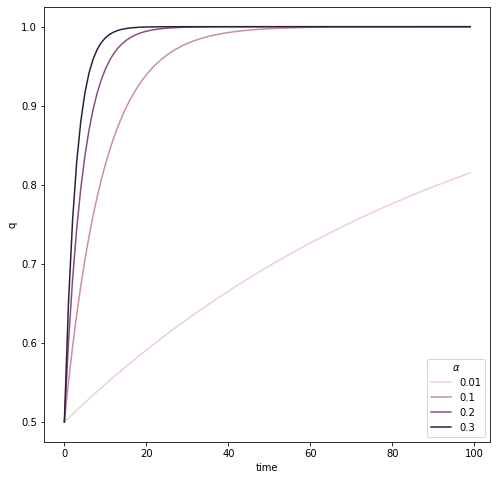

In [20]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot one line for each alpha-value
sns.lineplot(data=df_alpha, x="time", y="q", hue=r"$\alpha$")

plt.show()

 ---

 * Represent the probability of choice for an option against another depending on the difference of value, for $\beta$-values

In [21]:
# Define a set of values to test
beta_values = (1.0, 5.0, 10.0, 20.0)

# Define possible differences of reward between the two options
min_reward = 0
max_reward = 1
max_diff = max_reward - min_reward
delta_values = np.linspace(-max_diff, max_diff, 100)

# Results container
row_list = []

# For each beta value...
for beta in (beta_values):
    # For each delta value...
    for delta in (delta_values):
        
        # Compute the choice probability
        p = 1 / (1 + np.exp(-beta*delta))
        
        # Backup
        row_list.append({
            "Q(A) - Q(B)": delta,
            "p(A)": p,
            r"$\beta$": beta
        })

# Create a dataframe
df_beta = pd.DataFrame(row_list)

# Print...
display(df_beta)

,Q(A) - Q(B),p(A),$\beta$
0,-1.000000,0.268941,1.0
1,-0.979798,0.272932,1.0
2,-0.959596,0.276959,1.0
3,-0.939394,0.281023,1.0
4,-0.919192,0.285123,1.0
...,...,...,...
395,0.919192,1.000000,20.0
396,0.939394,1.000000,20.0
397,0.959596,1.000000,20.0
398,0.979798,1.000000,20.0


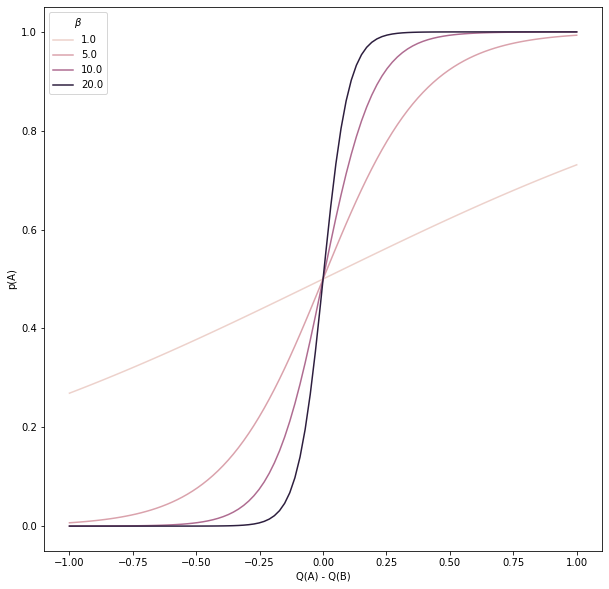

In [22]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot one line for each beta-value
sns.lineplot(data=df_beta, x="Q(A) - Q(B)", y="p(A)", hue=r"$\beta$")

plt.show()

## 3. Parameter Fitting &amp; Parameter Recovery<a id="S3"></a>
<a href="#Course-Overview">Course Overview</a>

<img src="img/optimization.jpeg" width="300">

<div class="alert alert-block alert-danger">
<h3><img src="img/logo/warning.png" width="20" align="left">&nbsp;Warning</h3>
<br>
    You should operate also exploratory simulations (as described in <a class="alert-link" href="#2.-Exploratory-Simulations">Section 2</a>) for <strong>all</strong> the models in competition before proceeding to parameter fitting &amp; parameter recovery.</div>

<div class="alert alert-block alert-success">
<h3><img src="img/logo/goal.png" width="20" align="left">&nbsp;Section Goal</h3>
<ul><li>Be able to fit the parameters of your model;
    <li>Assuming that your model is correct, have an estimate of how you are able to retrieve the 'true' parameters.</ul>
</div>

### 3.1 Define a likelihood function<a id="S3.1"></a>
<a href="#Course-Overview">Course Overview</a>


<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
<ul>
    <li>Be able to express numerically the likelihood to have obtained the data given a given model and a specific set of parameters.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;**How to do it?**

* Determine the (log) likelihood of your model:

\begin{equation}
\log p(D \mid M, \theta) = \sum_{d \in D} \log p(d \mid M, \theta)
\end{equation}

*Note: For several reasons (including numerical precision on computers but also easier algebraic manipulation), it is preferable to use the log-likelihood than the likelihood.*

In [23]:
def log_likelihood(model, param, data):

    # Create the agent
    agent = model(*param)

    # Data container
    ll = np.zeros(T)

    # Simulate the task
    for t in range(T):

        # Get choice and success for t
        c, s = data.choice[t], data.success[t]

        # Look at probability of choice
        p_choice = agent.decision_rule()
        p = p_choice[c]

        # Compute log
        ll[t] = np.log(p + np.finfo(np.float).eps)

        # Make agent learn
        agent.learning_rule(option=c, success=s)

    return np.sum(ll)

### 3.2 Choose a way to search for the best parameters<a id="S3.2"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
<ul><li>Identify a method that allows you to 'easily' identify 
    the best-fit parameters for each of your models.</ul>
<br>
<br><i>Note: parameter space can be extremly&mdash;infinitely&mdash;large, so it is impossible to compute all the possibilities: you need to select which are the most interesting set of parameters to test.</i>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;**How to do it?**

*Note: Here, we will use the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">function 'minimize' from the SciPy library</a>. However, there is multiple of other ways to do it.* 

In [24]:
def objective(param, model, data):
    # Since we will look for the minimum, 
    # let's return -LLS instead of LLS
    return - log_likelihood(model=model,
                            data=data,
                            param=param)

def optimize(model, data):

    # Define an init guess
    init_guess = [(b[1] - b[0])/2 for b in model.fit_bounds]

    # Run the optimizer
    res = scipy.optimize.minimize(
        fun=objective,
        x0=init_guess,
        bounds=model.fit_bounds,
        args=(model, data))

    # Make sure that the optimizer ended up with success
    assert res.success

    # Get the best param and best value from the 
    best_param = res.x
    best_value = res.fun

    return best_param, best_value

### 3.3 Try with a single agent<a id="S3.3"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>

<ul><li>Be sure that in the simplest case (single subject), 
you are able to fit the parameters on your model and that the best-fit parameter values are close to the 'true' values.
    </ul>
    <br>
    <br><i>Note: At this stage, you will just rely on an intuitive appreciation. A systematized approach is provided at <a href="#3.6-Systematize-the-process" >the end of this section</a>.</i>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Retrieve the parameters that you used to simulate a single agent

In [25]:
# Run the optimization
best_param, best_value = optimize(model=RW, data=bhv_single)

print(f"'True' parameters: {tuple(param_single)}")
print(f"Best-fit parameters: {tuple(best_param)}\n")

'True' parameters: (0.1, 10.0)
Best-fit parameters: (0.12063388007364427, 10.814516646594747)



---

* Try to simulate with the best-fit parameters and compare what you obtain:

In [26]:
# Seed the pseudo-random number generator
np.random.seed(123)

# New simulation with best-fit parameters 
bhv_single_bf = run_simulation(model=RW, param=best_param)

# Get the values of the latent variables
lv_single_bf = latent_variables_rw(bhv_single_bf, param=best_param)

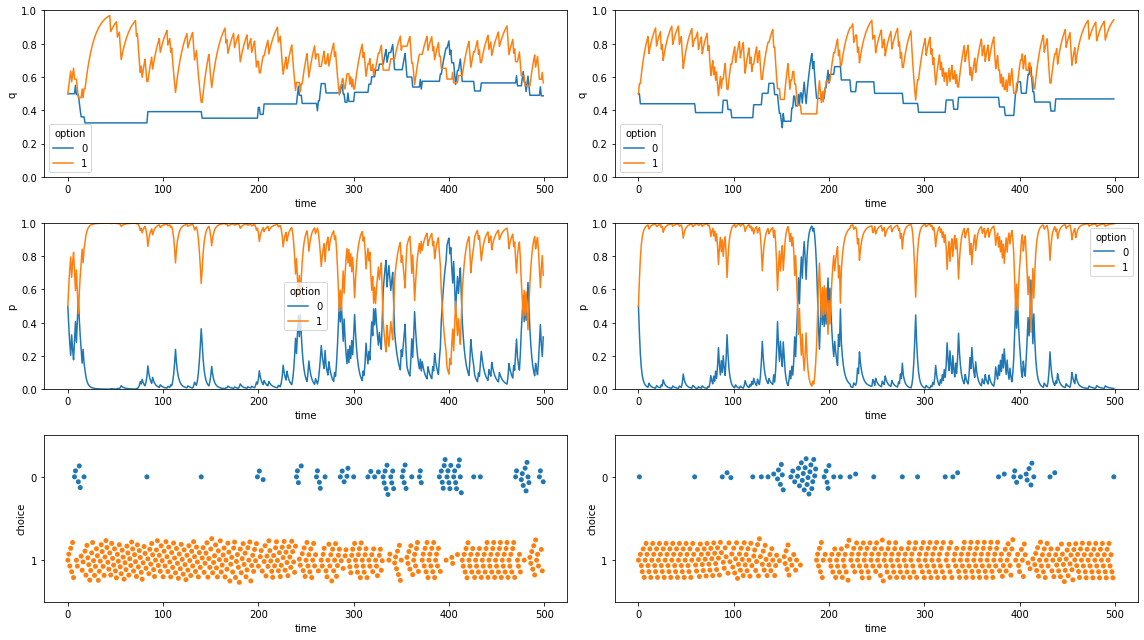

In [27]:
# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 9))

# For the former data and the data using the best-fit parameters...
for i, (bhv, lv) in enumerate(((bhv_single, lv_single), (bhv_single_bf, lv_single_bf))):
    
    # Plot the q-values
    sns.lineplot(data=lv, x="time", y="q", hue="option", ax=axes[0, i])
    
    # Plot the choice probabilities
    sns.lineplot(data=lv, x="time", y="p", hue="option", ax=axes[1, i])
    
    # Plot the choices
    sns.swarmplot(data=bhv, x='time', y='choice', orient="h", ax=axes[2, i])
    
        
    # Set the y-axis limits
    for idx in (0, 1):
        axes[idx, i].set_ylim(0, 1)
    
plt.tight_layout()
plt.show()

### 3.4 Explore the behavior of the likelihood function over the parameter space<a id="S3.4"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Observe the behavior of your likelihood function over the parameter space;
        <li>Notify the local minima.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Represent the objective function values over the parameter space (phase diagram):

In [28]:
# Choose the model
model = RW

# Choose the grid size
grid_size = 40

# Set the values to use for each parameter
parameter_values = np.atleast_2d([np.linspace(*b, grid_size) 
                                  for b in model.fit_bounds])

# Create a grid 
grid = np.asarray(list(product(*parameter_values)))

# Create a dataframe that stores it
grid_df = pd.DataFrame(grid, columns=(r"$\alpha$", r"$\beta$"))

# Print...
display(grid_df)

,$\alpha$,$\beta$
0,0.0,1.000000
1,0.0,1.487179
2,0.0,1.974359
3,0.0,2.461538
4,0.0,2.948718
...,...,...
1595,1.0,18.051282
1596,1.0,18.538462
1597,1.0,19.025641
1598,1.0,19.512821


In [29]:
# Results container
row_list = []

print("Computing data for parameter space exploration...")
# Loop over each value of the parameter grid for both parameters
for _, param in tqdm(grid_df.iterrows(), total=len(grid_df), file=sys.stdout):

    # Compute the log likelihood
    ll = log_likelihood(
        data=bhv_single,  # THIS IS SPECIFIC
        model=RW,              # THIS IS SPECIFIC
        param=param)
    
    # Backup
    row_list.append({
        r"$\alpha$": param[r"$\alpha$"],
        r"$\beta$": param[r"$\beta$"],
        "log-likelihood": ll})

# Create a dataframe
ll_df = pd.DataFrame(row_list)

# Save it for later use
ll_df.to_csv(os.path.join(BKP_FOLDER, "log_likelihood_grid-bhv_single.csv"))

# Print...
display(ll_df)

Computing data for parameter space exploration...
100%|██████████| 1600/1600 [00:34<00:00, 45.86it/s]


,$\alpha$,$\beta$,log-likelihood
0,0.0,1.000000,-346.573590
1,0.0,1.487179,-346.573590
2,0.0,1.974359,-346.573590
3,0.0,2.461538,-346.573590
4,0.0,2.948718,-346.573590
...,...,...,...
1595,1.0,18.051282,-1305.681107
1596,1.0,18.538462,-1336.616820
1597,1.0,19.025641,-1367.552573
1598,1.0,19.512821,-1398.488356


In [30]:
# Adapt the shape of the dataframe
ll_df_pivoted = ll_df.pivot(index=r"$\beta$", columns=r"$\alpha$", values="log-likelihood")

# Print...
display(ll_df_pivoted)

$\alpha$,0.000000,0.025641,0.051282,0.076923,0.102564,0.128205,0.153846,0.179487,0.205128,0.230769,...,0.769231,0.794872,0.820513,0.846154,0.871795,0.897436,0.923077,0.948718,0.974359,1.000000
$\beta$,,,,,,,,,,,,,,,,,,,,,
1.000000,-346.57359,-308.598769,-302.439952,-297.764475,-293.895062,-290.689473,-288.053874,-285.911228,-284.195571,-282.849659,...,-293.143453,-294.569540,-296.060791,-297.619784,-299.249804,-300.954841,-302.739596,-304.609495,-306.570714,-308.630214
1.487179,-346.57359,-292.344285,-283.828160,-277.492504,-272.341684,-268.156726,-264.792465,-262.131369,-260.074830,-258.539136,...,-281.997236,-284.602856,-287.324552,-290.167182,-293.136672,-296.240036,-299.485397,-302.882030,-306.440414,-310.172299
1.974359,-346.57359,-277.523587,-267.031319,-259.391298,-253.299590,-248.457628,-244.666893,-241.768724,-239.632477,-238.149505,...,-278.525737,-282.502533,-286.649395,-290.973264,-295.482497,-300.186914,-305.097853,-310.228255,-315.592752,-321.207786
2.461538,-346.57359,-264.095150,-251.966387,-243.329678,-236.585429,-231.354568,-227.384670,-224.476337,-222.468140,-221.228324,...,-281.068313,-286.515930,-292.185054,-298.084465,-304.224787,-310.618582,-317.280464,-324.227228,-331.477992,-339.054372
2.948718,-346.57359,-252.008422,-238.535783,-229.158247,-221.995893,-216.590072,-212.635146,-209.892131,-208.170404,-207.316978,...,-288.167469,-295.113690,-302.327205,-309.818806,-317.601760,-325.691962,-334.108091,-342.871790,-352.007849,-361.544405
3.435897,-346.57359,-241.205483,-226.632226,-216.718455,-209.321431,-203.905210,-200.112393,-197.665882,-196.347463,-195.984582,...,-298.653142,-307.076938,-315.807264,-324.857716,-334.245267,-343.990445,-354.117522,-364.654688,-375.634248,-387.092803
3.923077,-346.57359,-231.622802,-216.143290,-205.850269,-198.356834,-193.052615,-189.530088,-187.475422,-186.644140,-186.845425,...,-311.636844,-321.488195,-331.679259,-342.227788,-353.156078,-364.491128,-376.264795,-388.513929,-401.280511,-414.611769
4.410256,-346.57359,-223.192968,-206.955347,-196.398049,-188.908413,-183.804306,-180.629395,-179.034094,-178.748580,-179.564649,...,-326.466254,-337.680767,-349.263229,-361.237270,-373.632453,-386.484353,-399.834621,-413.731019,-428.227437,-443.383874
4.897436,-346.57359,-215.846321,-198.956745,-188.214583,-180.798172,-175.955395,-173.181755,-172.092341,-172.392445,-173.856976,...,-342.671436,-355.180071,-368.081116,-381.405955,-395.193471,-409.489993,-424.349208,-439.832039,-456.006477,-472.947331


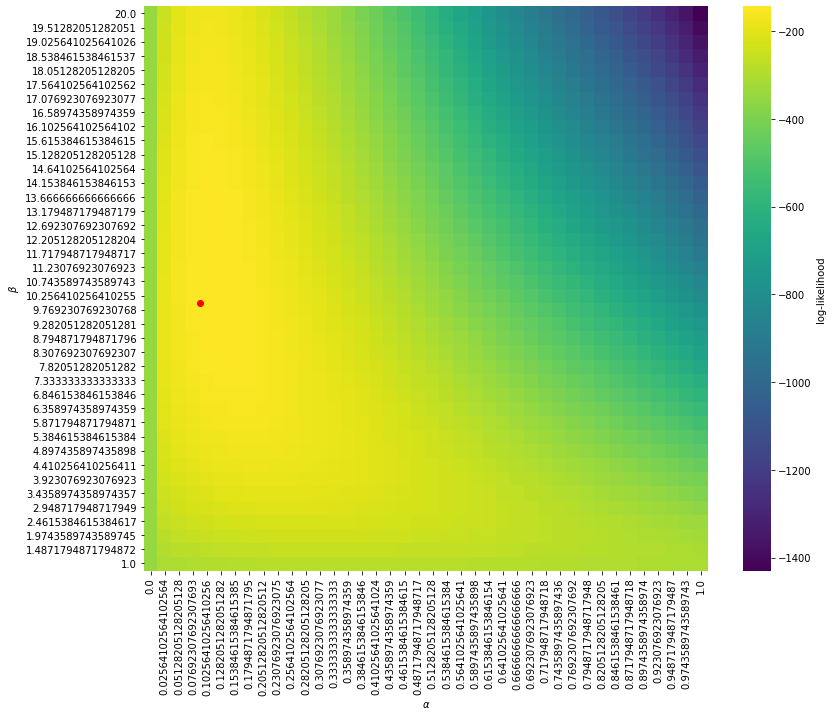

In [31]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Draw heatmap
sns.heatmap(data=ll_df_pivoted, cmap="viridis", ax=ax, cbar_kws={'label': 'log-likelihood'})


# Transform the parameter values into grid coordinates
coord_param = [(grid_size)*(p-b[0]) / (b[1]-b[0]) for p, b in zip(param_single, model.fit_bounds)]
# Plot the position of the 'true' parameters
ax.scatter(*coord_param, color='red')

# Invert y-axis
ax.invert_yaxis()

# Make it look square
ax.set_aspect(1)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left">&nbsp;Warning</h2>
    <br>This solution only works if your model has two parameters. For a model having only one parameter, you can represent it by a single curve of the log-likelihood against the parameter value (you can refer to the <a href="#S2.-Parameter-space-exploration" class="alert-link">supplementary</a> for that). For more than two parameters, things get more complicated: you can still do one plot per parameter as shown in the <a href="#S2.-Parameter-space-exploration" class="alert-link">supplementary</a> for the present case, but the interpretation is not always easy.</div>

### 3.5 Try with a homogeneous population<a id="S3.5"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Generalize what you observe with a single subject to a homogeneous population.
    </ul>
    <br>
    <br><i>Note: At this stage, you will just rely on an intuitive appreciation. A systematized approach is provided at <a href="#3.6-Systematize-the-process" >the end of this section</a>.</i>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

- Maintain constant the parameters that you are using (except the seed of your pseudo-random number generator):

In [32]:
# Seed the pseudo-random number generator
np.random.seed(134)

# Define as parameter the best-fit parameter for the single agent
param_hom_pop_bf = [best_param for _ in range(n)]

# Get behavior for best-fit
bhv_hom_pop_bf = run_sim_pop(model=RW, param=param_hom_pop_bf)

# Print...
display(bhv_hom_pop_bf)

100%|██████████| 30/30 [00:00<00:00, 39.54it/s]


,time,choice,success,id
0,0,1,True,0
1,1,1,False,0
2,2,1,False,0
3,3,1,True,0
4,4,0,True,0
...,...,...,...,...
495,495,1,False,29
496,496,0,True,29
497,497,0,False,29
498,498,0,True,29


In [33]:
# Get latent variables values
lv_hom_pop_bf = latent_variables_rw_pop(bhv_data=bhv_hom_pop_bf, 
                                        param=param_hom_pop_bf)

# Print...
display(lv_hom_pop_bf)

,time,option,q,p,id
0,0,0,0.500000,0.500000,0
1,0,1,0.500000,0.500000,0
2,1,0,0.500000,0.342472,0
3,1,1,0.560317,0.657528,0
4,2,0,0.500000,0.519662,0
...,...,...,...,...,...
995,497,1,0.625464,0.592205,29
996,498,0,0.519675,0.241576,29
997,498,1,0.625464,0.758424,29
998,499,0,0.577618,0.373454,29


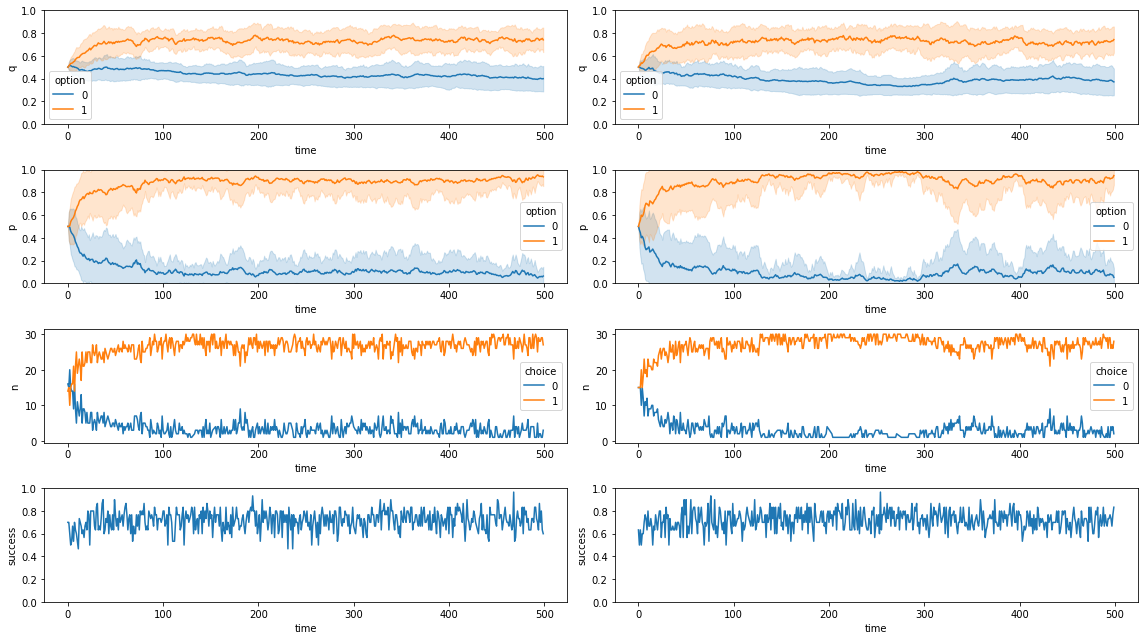

In [34]:
# Create figure and awes
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 9))

for i, (bhv, lv) in enumerate(((bhv_hom_pop, lv_hom_pop), 
                               (bhv_hom_pop_bf, lv_hom_pop_bf))):
    
    # Plot the q-values
    sns.lineplot(data=lv, x="time", y="q", hue="option", ax=axes[0, i], ci="sd")
    
    # Plot the p-values
    sns.lineplot(data=lv, x="time", y="p", hue="option", ax=axes[1, i], ci="sd")
        
    # Plot the choices
    rep_choice = bhv.groupby(['time', 'choice']).size().to_frame('n').reset_index()
    sns.lineplot(data=rep_choice, x="time", y="n", hue="choice", ax=axes[2, i])
    
    # Plot the successes
    sns.lineplot(data=bhv, x="time", y="success", ax=axes[3, i], ci=None)
    
    # Set the limits of the y-axis 
    for idx in (0, 1, 3):
        axes[idx, i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### 3.6 Systematize the process<a id="S3.6"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Test that you are able to retrieve close enough parameters for a large (enough) set of parameters;
        <li>Have a metric of the quality of your parameter recovery (Pearson's r), including statistical assessment of the relevancy.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Represent the parameters used to simulate against the parameters recovered:

In [35]:
# Seed the pseudo-random number generator
np.random.seed(1284)

# Select one model
model = RW 

# Define the number of agents to simulate
n = 30 

# Data container
row_list = []

# For each agent...
for i in tqdm(range(n), file=sys.stdout):

    # Generate parameters to simualte
    param_to_sim = [np.random.uniform(*b)
                    for b in model.fit_bounds]

    # Simulate
    d = run_simulation(model=model, param=param_to_sim)

    # Optimize
    best_param, best_value = optimize(model=model, data=d)

    # Backup
    for j in range(len(param_to_sim)):
        row_list.append({
            "Parameter": model.param_labels[j],
            "Used to simulate": param_to_sim[j],
            "Recovered": best_param[j]})

# Create dataframe and save it
df = pd.DataFrame(row_list)
df.to_csv(os.path.join(BKP_FOLDER, "likelihood_explo.csv"))

100%|██████████| 30/30 [00:25<00:00,  1.19it/s]


In [36]:
# Load the dataframe and display it
df = pd.read_csv(os.path.join(BKP_FOLDER, "likelihood_explo.csv"), index_col=[0])
display(df.head())

,Parameter,Used to simulate,Recovered
0,$\alpha$,0.774765,0.753370
1,$\beta$,15.400237,12.862639
2,$\alpha$,0.750155,0.801276
3,$\beta$,8.660672,13.036533
4,$\alpha$,0.498568,0.493770


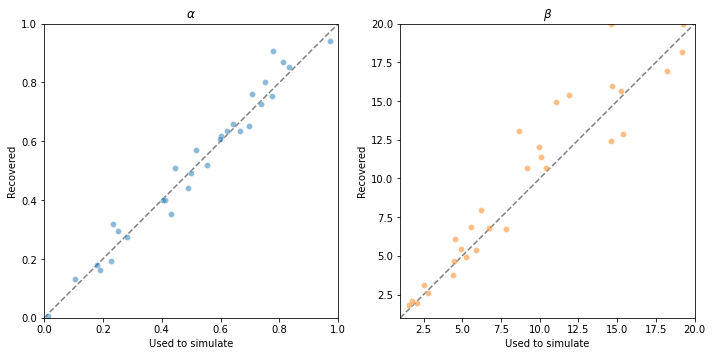

In [38]:
# Plot
param_names=RW.param_labels
param_bounds=RW.fit_bounds
n_param = len(param_names)

# Define colors
colors = [f'C{i}' for i in range(n_param)]

# Create fig and axes
fig, axes = plt.subplots(ncols=n_param,
                         figsize=(10, 9))

for i in range(n_param):

    # Select ax
    ax = axes[i]
    
    # Get param name
    p_name = param_names[i]
    
    # Set title
    ax.set_title(p_name)

    # Create scatter
    sns.scatterplot(data=df[df["Parameter"] == p_name], 
                    x="Used to simulate", y="Recovered", 
                    alpha=0.5, color=colors[i], 
                    ax=ax)

    # Plot identity function
    ax.plot(param_bounds[i], param_bounds[i], 
            linestyle="--", alpha=0.5, color="black", zorder=-10)
    
    # Set axes limits
    ax.set_xlim(*param_bounds[i])
    ax.set_ylim(*param_bounds[i])

    # Square aspect
    ax.set_aspect(1)

plt.tight_layout()
plt.show()

---

* Compute the Pearson's coefficient for each model parameter, and assess the stastistical relevance:

In [39]:
# Set the significance threshold
threshold = 0.05

# Results container
row_list = []

# For each parameter
for p_name in param_names:

    # Get the elements to compare
    x = df.loc[df["Parameter"] == p_name, "Used to simulate"]
    y = df.loc[df["Parameter"] == p_name, "Recovered"]
    
    # Compute a Pearson correlation
    r, p = scipy.stats.pearsonr(x, y)
    
    # Backup
    row_list.append({
        "parameter": p_name,
        "r": r,
        "p": p,
        f"p<{threshold}": p<threshold
    })

# Create dataframe
df_stat = pd.DataFrame(row_list)

# Print the results
display(df_stat)

,parameter,r,p,p<0.05
0,$\alpha$,0.98438,1.145584e-22,True
1,$\beta$,0.94846,1.665674e-15,True


## 4. Model Comparison &amp; Model Recovery<a id="S4"></a>
<a href="#Course-Overview">Course Overview</a>

<img src="img/competition.png" width="500">


<div class="alert alert-block alert-danger">
<h3><img src="img/logo/warning.png" width="20" align="left">&nbsp;Warning</h3>
    <br>You should operate the process for parameter recovery (as described in <a class="alert-link" href="#3.-Parameter-Fitting-&amp;-Parameter-Recovery">Section 3</a>) for <strong>all</strong> the models in competition before proceeding to model comparison &amp; model recovery.</div>
    
<div class="alert alert-block alert-success">
<h3><img src="img/logo/goal.png" width="20" align="left">&nbsp;Section Goal</h3>
<ul><li>Be able to compare your models
    <li>Ensure that each model, when used for simulating, is selected as the best model (i.e. you are able to recover the 'true' model).</ul>
</div>

### 4.1 Choose a metric<a id="S4.1"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Choose a metric to compare your models.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Before all, define your model space. Here, we will compare:
    * Random selection
    * Win-Stay-Lose-Switch
    * Rescola-Wagner
    * Rescola-Wagner-Choice-Kernel

In [40]:
models = Random, WSLS, RW, RWCK

* Then choose a metric to compare your models. Here, we will use the Bayesian Information Criterion (BIC):
\begin{equation}
\text{BIC} = - 2 \log p(D\mid {\widehat {\theta }},M) + k \log(T)
\end{equation}

*Note: The lowest the BIC score is, the better it is.*

In [41]:
def bic(ll, k, n_iteration):
    return -2 * ll + k * np.log(n_iteration)

### 4.2 Try with a single agent<a id="S4.2"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-danger">
<h3><img src="img/logo/warning.png" width="20" align="left">&nbsp;Warning</h3>
<br>
    You should operate this process for <b>all</b> the models in competition (not only for one, even if you think it is the best one).</div>
   
<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Check that everything is going fine in the most simple case.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

In [44]:
# Load the results for a single agent and display them
bhv_single = pd.read_csv(os.path.join(BKP_FOLDER, "bhv_single.csv"), 
                         index_col=[0])
display(bhv_single)

,time,choice,success
0,0,1,True
1,1,1,True
2,2,1,True
3,3,1,False
4,4,1,True
...,...,...,...
495,495,0,True
496,496,0,False
497,497,1,True
498,498,1,False


In [45]:
# Compute bic scores for evey model for our initial set of data
row_list = []

# For each model
for m in tqdm(models, file=sys.stdout):
    
    # Specific case for the random model
    if m == Random:
        # There is no best param (non parametric model)
        best_param = []
        # Get log-likelihood for best param
        ll = log_likelihood(data=d, param=[], model=Random)
    
    else:
        # Optmize
        best_param, best_value = optimize(data=bhv_single, model=m)

        # Get log-likelihood for best param
        ll = -best_value

    # Compute the BIC score
    bs = bic(ll, k=len(m.fit_bounds), n_iteration=T)

    # Backup
    row_list.append({
        "model": m.__name__,
        "log-likelihood": ll,
        "bic": bs,
        "best-param": best_param})

# Create dataframe
comp_single = pd.DataFrame(row_list)

# Print...
display(comp_single)

100%|██████████| 4/4 [00:05<00:00,  1.27s/it]


,model,log-likelihood,bic,best-param
0,Random,-346.573590,693.147181,[]
1,WSLS,-290.003355,586.221318,[0.5330661342774122]
2,RW,-143.754364,299.937945,"[0.12063388007364427, 10.814516646594747]"
3,RWCK,-145.992744,316.843920,"[0.17148648721018542, 7.671889052681005, 0.033..."


### 4.3 Systematize the approach<a id="S4.3"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Test that you can generalize what you observed with one single individual;
        <li>Have a metric of the quality of your model recovery.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Draw a confusion matrix:

In [46]:
# Seed the random number generator
np.random.seed(1234)

# Select how many simualtions per model
n_sim = 20

# Number of models
n_models = len(models)

# Data container
confusion_matrix = np.zeros((n_models, n_models))

# Set up progress bar
with tqdm(total=n_sim*n_models**2, file=sys.stdout) as pbar:
    
    # Loop over each model
    for i, m_to_sim in enumerate(models):

        for j in range(n_sim):

            # Select parameters to simulate
            param = [np.random.uniform(*b) for b in m_to_sim.fit_bounds]

            # Simulate
            d = run_simulation(model=m_to_sim, param=param)
            
            # Container for BIC scores
            bs_scores = np.zeros(n_models)
            
            # For each model
            for k, m_to_fit in enumerate(models):
                
                # Specific case for the random model
                if m_to_fit == Random:
                    # There is no best param (non parametric model)
                    best_param = []
                    # Get log-likelihood for best param
                    ll = log_likelihood(data=d, param=[], model=Random)
                
                else:
                    # Optmize
                    best_param, best_value = optimize(data=d, model=m_to_fit)

                    # Get log-likelihood for best param
                    ll = -best_value

                # Compute the BIC score
                n_param_m_to_fit = len(m_to_fit.fit_bounds)
                bs_scores[k] = bic(ll, k=n_param_m_to_fit, n_iteration=T)
                
                # Update progress bar
                pbar.update(1)

            # Get minimum value for bic (min => best)
            min_score = np.min(bs_scores)

            # Get index(es) of models that get best bic
            idx_min = np.flatnonzero(bs_scores == min_score)

            # Add result in matrix
            confusion_matrix[i, idx_min] += 1/len(idx_min)

# Get the model names
model_names = [m.__name__ for m in models]

# Create dataframe
df_cm = pd.DataFrame(confusion_matrix, 
                     index=model_names,
                     columns=model_names)

# Save it for later use
df_cm.to_csv(os.path.join(BKP_FOLDER, "confusion_matrix.csv"))

100%|██████████| 320/320 [06:34<00:00,  1.23s/it]


In [47]:
# Load the dataframe
df_cm = pd.read_csv(os.path.join(BKP_FOLDER, "confusion_matrix.csv"), index_col=[0])

# Display the content
display(df_cm)

,Random,WSLS,RW,RWCK
Random,20.0,0.0,0.0,0.0
WSLS,2.0,17.0,1.0,0.0
RW,0.0,0.0,20.0,0.0
RWCK,0.0,0.0,5.0,15.0


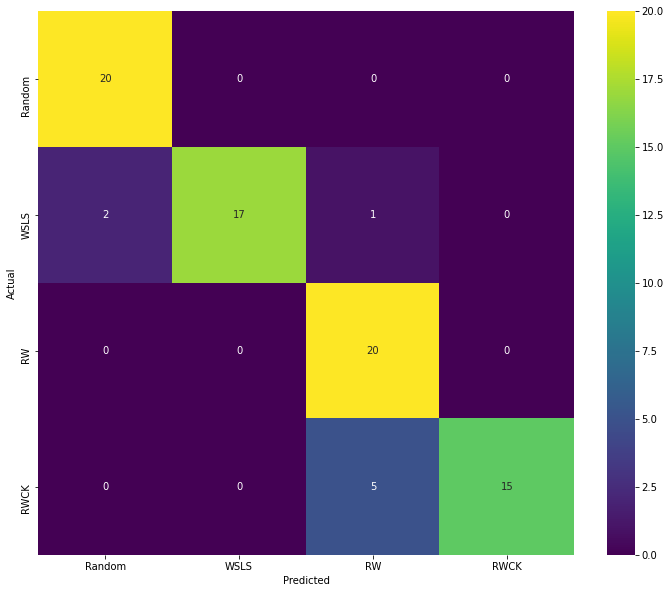

In [48]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Display the results using a heatmap
sns.heatmap(data=df_cm, cmap='viridis', annot=True, ax=ax)

# Set x-axis and y-axis labels
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

plt.show()

<img src="img/precision_recall.jpeg" width="700">

* Compute adequate statistics to know the robustness of your observations

In [49]:
# Results container
row_list = []

# For each model...
for m in model_names:
    
    # Get the number of true positive
    k = df_cm.at[m, m]
    
    # Get the number of true positive + false NEGATIVE
    n = np.sum(df_cm.loc[m])
    
    # Compute the recall
    recall = k/n
    
    # Compute the confidence interval
    ci_recall = statsmodels.stats.proportion.proportion_confint(count=k, nobs=n)
    
    # Get the number of true positive + false POSITIVE
    n = np.sum(df_cm[m])
    
    # Compute the precision
    precision = k/n
    
    # Compute the confidence intervals
    ci_pres = statsmodels.stats.proportion.proportion_confint(k, n)
    
    # Compute the f score
    f_score = 2*(precision* recall)/(precision+recall)
    
    # Backup
    row_list.append({
        "model": m,
        "Recall": recall,
        "Recall [CI]": ci_recall,
        "Precision": precision,
        "Precision [CI]": ci_pres,
        "F1 score": f_score
    })

# Create dataframe and display it
df_stat = pd.DataFrame(row_list, index=model_names)
display(df_stat)

,model,Recall,Recall [CI],Precision,Precision [CI],F1 score
Random,Random,1.00,"(1.0, 1.0)",0.909091,"(0.7889629591991079, 1.0)",0.952381
WSLS,WSLS,0.85,"(0.6935094252616949, 1.0)",1.000000,"(1.0, 1.0)",0.918919
RW,RW,1.00,"(1.0, 1.0)",0.769231,"(0.607281612087224, 0.9311799263743146)",0.869565
RWCK,RWCK,0.75,"(0.5602273032177509, 0.9397726967822491)",1.000000,"(1.0, 1.0)",0.857143


Note: Confidence intervals are <a href="https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval"> binomial confidence intervals</a>.

## 5. Artificial Experiment<a id="S5"></a>
<a href="#Course-Overview">Course Overview</a>

<img src="img/experiment.jpg" width="150">

<div class="alert alert-block alert-danger">
<h3><img src="img/logo/warning.png" width="20" align="left">&nbsp;Warning</h3>
    <ul>
        <li>You should operate the process for model recovery (as described in <a class="alert-link" href="#4.-Model-Comparison-&amp;-Model-Recovery">Section 4</a>) for <strong>all</strong> the models in competition before 'faking' actual experiments.
        <li> You should conduct 'fake' experiments with <strong>all</strong> the models in competition, even if here, we will conduct an experiment only with the Rescorla-Wagner model. 
    </ul>
</div>



<div class="alert alert-block alert-success">
<h3><img src="img/logo/goal.png" width="20" align="left">&nbsp;Section Goal</h3>
    <ul>
    <li>Have an overview about what the results of your experiment could look like, under the assumption that you get the best model, but it exists small variations in the population in terms of parametrization;
    <li> Be sure that you can retrieve the model in this context;
    <li> Have an idea about the distribution of your metrics regarding model selection (log-likelihood sums, BIC);
    <li> More generally, it is your last resort before the actual experiment (user study) to avoid bad surprises!
    </ul>
</div>

### 5.1 Generate data<a id="S5.1"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Generate data with a population of (relatively enough) heterogenous agents.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Generate parameters

In [50]:
# Seed the pseudo-random number generator
np.random.seed(1234)

# Select the model to use and the number of subjects
model = RW
n = 30

# Let's assume a normal distribution of the parameters in the population
dist_param=[(0.1, 0.05), (10.0, 0.5)]

# Retrieve the number of parameters
n_param = len(model.fit_bounds)

# Container for the results
param = np.zeros((n, n_param))

# For each parameter...
for i in range(n_param):
    
    # Generate values
    dp = np.random.normal(*dist_param[i], size=n)

    # Ensure that no value is outside of the bounds
    inf_bound, sup_bound = model.fit_bounds[i]
    dp[dp<inf_bound] = inf_bound
    dp[dp>sup_bound] = sup_bound
    
    # Store the result
    param[:, i] = dp
    
# Print...
print(param)

[[1.23571758e-01 9.80107989e+00]
 [4.04512153e-02 1.01687188e+01]
 [1.71635348e-01 1.05237893e+01]
 [8.43674052e-02 1.05229691e+01]
 [6.39705633e-02 1.04318586e+01]
 [1.44358147e-01 9.93895421e+00]
 [1.42979421e-01 1.00623565e+01]
 [6.81738248e-02 9.83860260e+00]
 [1.00784819e-01 1.04208374e+01]
 [0.00000000e+00 1.11954803e+01]
 [1.57501786e-01 1.00380998e+01]
 [1.49597301e-01 9.71677703e+00]
 [1.47666206e-01 1.00180710e+01]
 [0.00000000e+00 8.96251120e+00]
 [8.32961317e-02 1.01238961e+01]
 [1.00105918e-01 9.55142161e+00]
 [1.20272671e-01 9.93160258e+00]
 [1.14454597e-01 1.00091446e+01]
 [1.66057910e-01 1.03777070e+01]
 [2.26547223e-02 1.01076343e+01]
 [8.98676838e-02 1.04205044e+01]
 [6.72015328e-02 9.27709496e+00]
 [1.09671069e-01 9.29901336e+00]
 [1.27671946e-01 9.94954090e+00]
 [1.65907578e-01 9.72587878e+00]
 [7.65347358e-02 9.92769025e+00]
 [1.33777704e-01 1.01770102e+01]
 [9.14863867e-03 9.98224349e+00]
 [9.08445730e-02 1.02828692e+01]
 [1.52948459e-01 1.07728294e+01]]


* Run the simulation

In [51]:
# Get the behavioral data and save it
bhv_het_pop = run_sim_pop(model=model, param=param)

# Save the results
bhv_het_pop.to_csv(os.path.join(BKP_FOLDER, "bhv_het_pop.csv"))

# Print
display(bhv_het_pop)

100%|██████████| 30/30 [00:00<00:00, 39.33it/s]


,time,choice,success,id
0,0,0,True,0
1,1,0,False,0
2,2,0,False,0
3,3,0,True,0
4,4,0,False,0
...,...,...,...,...
495,495,1,True,29
496,496,1,True,29
497,497,1,True,29
498,498,1,False,29


* Display the results

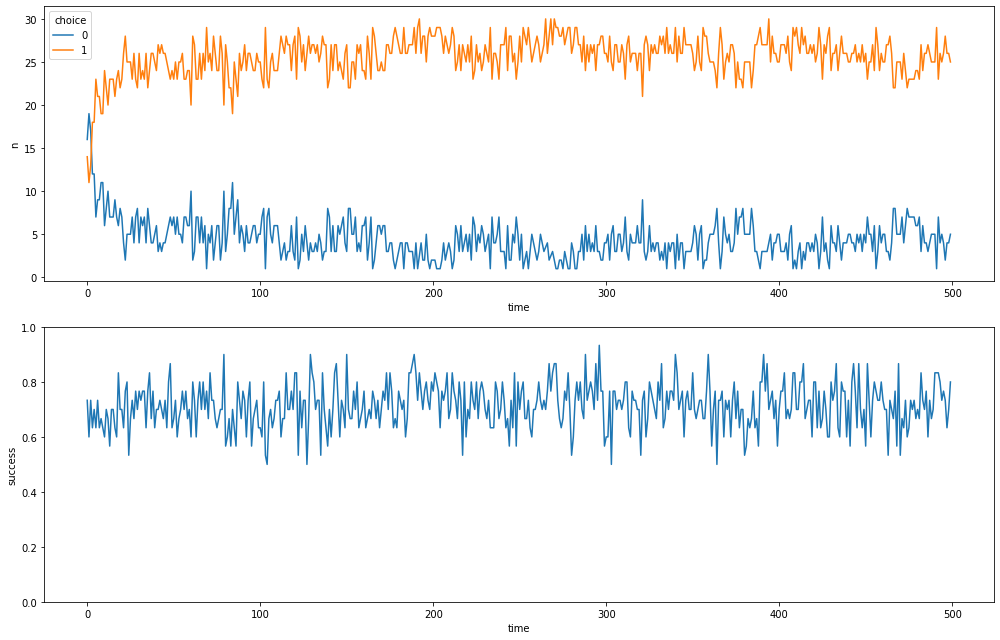

In [52]:
# Create figure and axes
fig, axes = plt.subplots(nrows=2, figsize=(14, 9))

# Plot the choices
rep_choice = bhv_het_pop.groupby(['time', 'choice']).size().to_frame('n').reset_index()
sns.lineplot(data=rep_choice, x="time", y="n", hue="choice", ax=axes[0])

# Plot the success
sns.lineplot(data=bhv_het_pop, x="time", y="success", ax=axes[1], ci=None)

# Set the limits of the y-axis
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### 5.2 Compare the models<a id="S5.2"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li> Being sure that in the 'true' context of the experiment, you are able to retrieve the 'best' model.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Compute the LLS and the BIC score for each subject

In [53]:
# Create a list 
row_list = []

# Loop over subjects
for id_, bhv in tqdm(bhv_het_pop.groupby("id"), file=sys.stdout):

    # For each model we wish to compare
    for m in models:
        
        # Specific case for the random model
        if m == Random:
            # There is no best param (non parametric model)
            best_param = []
            # Get log-likelihood for best param
            ll = log_likelihood(data=d, param=[], model=Random)
        else:
            # Optmize
            best_param, best_value = optimize(data=bhv, model=m)

            # Get log-likelihood for best param
            ll = -best_value

        # Compute the bit score
        bs = bic(ll, k=len(m.fit_bounds), n_iteration=T)
        
        # Add to the row list
        row_list.append({
            "id": id_,
            "BIC": bs,
            "LLS": ll,
            "model": m.__name__,
            "best-param": list(best_param)})

# Create dataframe and save it
model_comp = pd.DataFrame(row_list)
model_comp.to_csv(os.path.join(BKP_FOLDER, "model_comp.csv"))

100%|██████████| 30/30 [03:01<00:00,  6.07s/it]


In [54]:
# Load the results
model_comp = pd.read_csv(os.path.join(BKP_FOLDER, "model_comp.csv"), 
                         converters={'best-param': eval},
                         index_col=[0])

# Print...
display(model_comp)

,id,BIC,LLS,model,best-param
0,0,693.147181,-346.573590,Random,[]
1,0,617.750996,-305.768194,WSLS,[0.6012023866189595]
2,0,277.147839,-132.359311,RW,"[0.12920862221963078, 10.07205628475681]"
3,0,291.638702,-133.390135,RWCK,"[0.18910647706008743, 6.971227286890933, 0.025..."
4,1,693.147181,-346.573590,Random,[]
...,...,...,...,...,...
115,28,316.765924,-145.953746,RWCK,"[0.2695809199859402, 3.8911287667241954, 0.023..."
116,29,693.147181,-346.573590,Random,[]
117,29,603.623553,-298.704473,WSLS,[0.569138286693932]
118,29,242.022179,-114.796481,RW,"[0.14136944503951399, 11.74414808667311]"


* Plot the distributions of the likelihoods

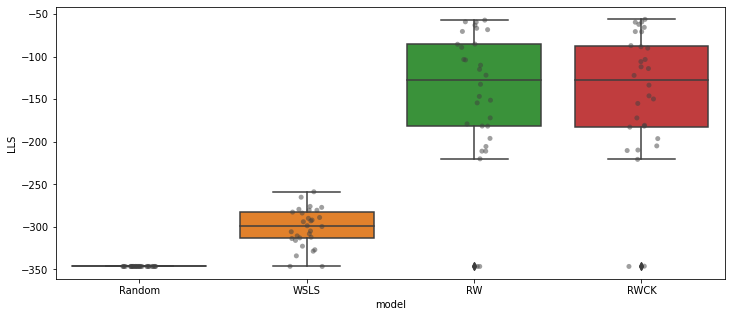

In [55]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Create the boxplots
sns.boxplot(data=model_comp, x="model", y="LLS", ax=ax)

# Add the individual data points
sns.stripplot(data=model_comp, x="model", y="LLS", ax=ax, color=".25", alpha=0.5)

plt.show()

* Compute the frequency with which each model is the most likely

In [56]:
# Get the list of the models
models = model_comp["model"].unique()

# Containter for the counts
counts = {m: 0 for m in models}

# For each model
for _, df in model_comp.groupby("id"):
    
    # Get the index of the maximum lls
    idx_max = df[['LLS']].idxmax()
    
    # Get the best model
    best_m = df.loc[idx_max, "model"].item()
    
    # Add one to this model's counter
    counts[best_m] += 1

# Retrieve the number of agents
n = model_comp["id"].unique().size

# Compute frequencies, confidence intervals and compute values that will be used for the error bars
freq = {m: counts[m]/n for m in models}
ci = {m:  statsmodels.stats.proportion.proportion_confint(count=counts[m], nobs=n) for m in models}
y_err = {m: np.abs(np.subtract(ci[m], freq[m])) for m in models}

# Save as a dataframe
df = pd.DataFrame({"ci": ci, "y_err": y_err, "freq": freq, "counts": counts})
display(df)

,ci,y_err,freq,counts
Random,"(0.0, 0.0)","[0.0, 0.0]",0.000000,0
WSLS,"(0.0, 0.09756736890584528)","[0.03333333333333333, 0.06423403557251195]",0.033333,1
RW,"(0.42469549188468364, 0.7753045081153163)","[0.17530450811531634, 0.17530450811531628]",0.600000,18
RWCK,"(0.19422613547627363, 0.5391071978570596)","[0.17244053119039301, 0.172440531190393]",0.366667,11


Note: Confidence intervals are <a href="https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval"> binomial confidence intervals</a>.

* Compute with which each model is the 'best' based on your metric

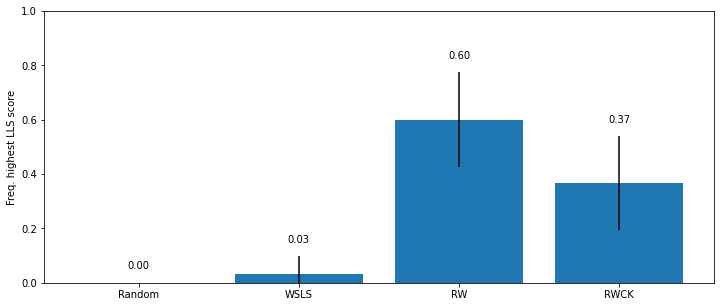

In [57]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Set the ticks positions and labels
x_pos = np.arange(len(df.index))
ax.set_xticks(x_pos)
ax.set_xticklabels(df.index)

freq = df["freq"].values
y_err = np.array(df["y_err"].values.tolist()).T

# Plot the bar
ax.bar(x_pos, freq, yerr=y_err)

# Add label indicating the frequence on top of each bar
for i in range(len(freq)):
    ax.text(x=i, y=freq[i]+y_err[1, i]+0.05,
            s=f'{freq[i]:.2f}', size=10,
            horizontalalignment='center')

# Set the label of the y-axis
ax.set_ylabel("Freq. highest LLS score")

# Set limits of the y-axis
ax.set_ylim(0, 1)

plt.show()

* Plot the distribution of the metric used to compare the models (here the BIC score)

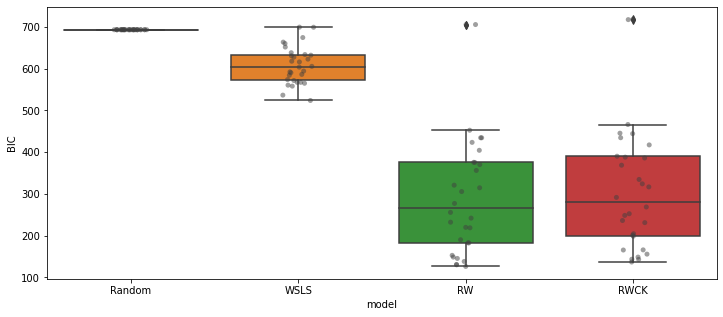

In [58]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Create the boxplots
sns.boxplot(data=model_comp, x="model", y="BIC", ax=ax)

# Add the individual data points
sns.stripplot(data=model_comp, x="model", y="BIC", ax=ax, color=".25", alpha=0.5)

plt.show()

* Compute the frequency with which each model is the 'best' according to a metric (here the BIC score)

In [59]:
# Retrieve the model list
models = model_comp["model"].unique()

# Containter for the counts
counts = {m: 0 for m in models}

# For each subject data...
for i, (_, df) in enumerate(model_comp.groupby("id")):
    
    # Get where the BIC is the lower
    idx_min = df[['BIC']].idxmin()
    
    # Retrieve the model name
    best_m = df.loc[idx_min, "model"].item()
    
    # Add one
    counts[best_m] += 1

# Retrieve the number of subjects
n = model_comp["id"].unique().size

# Compute frequencies, confidence intervals and compute values that will be used for the error bars
freq = {m: counts[m]/n for m in models}
ci = {m:  list(statsmodels.stats.proportion.proportion_confint(count=counts[m], nobs=n)) for m in models}
y_err = {m: list(np.abs(np.subtract(ci[m], freq[m]))) for m in models}

# Store the results in a dataframe
df = pd.DataFrame({"ci": ci, "y_err": y_err, "freq": freq, "counts": counts})
display(df)

,ci,y_err,freq,counts
Random,"[0.0, 0.1559273531228264]","[0.06666666666666667, 0.08926068645615974]",0.066667,2
WSLS,"[0.0, 0.0]","[0.0, 0.0]",0.000000,0
RW,"[0.8440726468771736, 1.0]","[0.0892606864561597, 0.06666666666666665]",0.933333,28
RWCK,"[0.0, 0.0]","[0.0, 0.0]",0.000000,0


Note: Confidence intervals are <a href="https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval"> binomial confidence intervals</a>.

* Represent the result

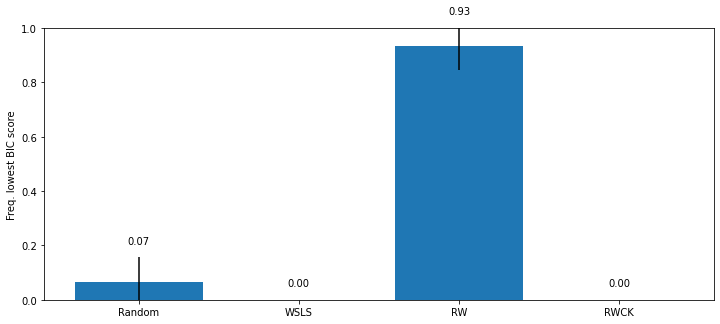

In [60]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Get the ticks
x_pos = np.arange(len(df.index))
ax.set_xticks(x_pos)
ax.set_xticklabels(df.index)

# Get frequencies and error bars
freq = df["freq"].values
y_err = np.array(df["y_err"].values.tolist()).T

# Plot the bars
ax.bar(x_pos, freq, yerr=y_err)

# Add label indicating the frequence on top of each bar
for i in range(len(freq)):

    ax.text(x=i, y=freq[i]+y_err[1, i]+0.05,
            s=f'{freq[i]:.2f}', size=10,
            horizontalalignment='center')

# Set the label of the y-axis
ax.set_ylabel("Freq. lowest BIC score")

# Set the y-limits
ax.set_ylim(0, 1)

plt.show()

* Is the model that you used to simulate selected as the best model?

### 5.3 Study the distribution of your best-fit parameters<a id="S5.3"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/logo/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Have an insight about how your distribution of best-fit parameters should look like.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Plot the distribution of your best-fit parameters:

In [61]:
# Extract from the data the best-fit parameters
bp = model_comp[model_comp["model"] == "RW"]["best-param"]
bp_arr = np.array(bp.values.tolist())
bp_dic = {pr_name: bp_arr[:, i] for i, pr_name in enumerate(RW.param_labels)}

# Store them in a new dataframe
df_param = pd.DataFrame(bp_dic).melt(var_name="parameter")

# Print...
display(df_param)

,parameter,value
0,$\alpha$,0.129209
1,$\alpha$,0.038572
2,$\alpha$,0.161778
3,$\alpha$,0.092379
4,$\alpha$,0.077242
5,$\alpha$,0.135605
6,$\alpha$,0.134478
7,$\alpha$,0.059681
8,$\alpha$,0.127007
9,$\alpha$,0.000237


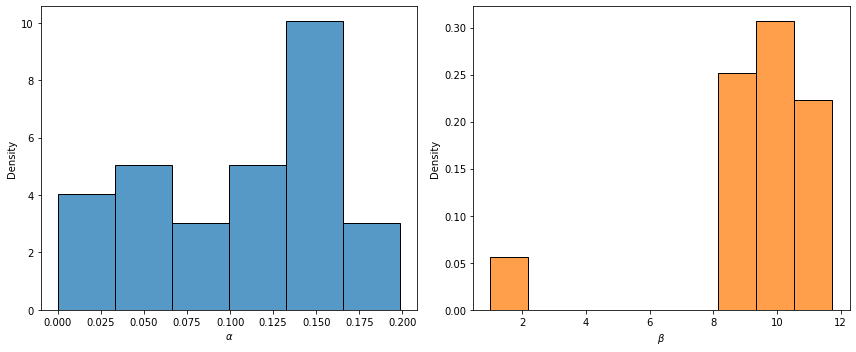

In [62]:
# Create figure and axes
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

# For each parameter
for i, (pr_name, df) in enumerate(df_param.groupby("parameter")):
    
    # Plot histogram
    sns.histplot(data=df, x="value", ax=axes[i], color=f"C{i}", stat="density")
    
    # Set the x-axis label
    axes[i].set_xlabel(pr_name)

plt.tight_layout()
plt.show()

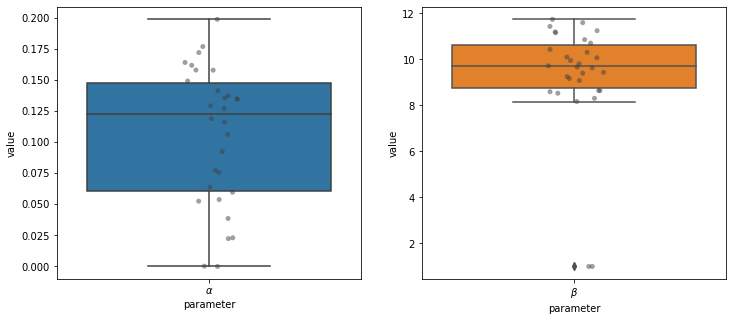

In [63]:
# Create figure and axes
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

# For each paramter...
for i, (_, df) in enumerate(df_param.groupby("parameter")):
    
    # Do a boxplot
    sns.boxplot(data=df, x="parameter", y="value", ax=axes[i], color=f"C{i}")
    
    # Represent individual data points
    sns.stripplot(data=df, x="parameter", y="value", ax=axes[i], color=".25", alpha=0.5)

plt.show()

### 5.4 Simulate with the best-fit parameters<a id="S5.4"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Be sure that in the 'true' context of your experiment, you are able to reproduce the behavior.
    </ul>
</div>

<img src="img/logo/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

In [64]:
# Seed the pseudo-random number generator
np.random.seed(1345)

# Get behavior for best-fit
bhv_het_pop_bf = run_sim_pop(model=RW, param=bp_arr)

100%|██████████| 30/30 [00:00<00:00, 39.99it/s]


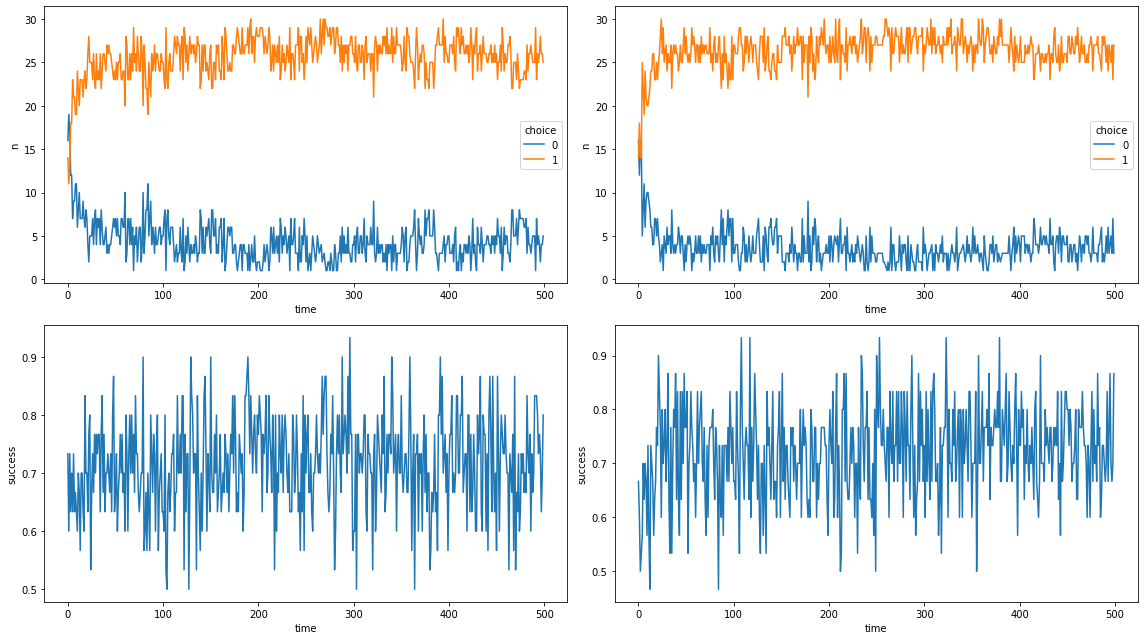

In [65]:
# Create figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

# For each dataset...
for i, bhv in enumerate((bhv_het_pop, bhv_het_pop_bf)):
    
    # Plot the choice
    rep_choice = bhv.groupby(['time', 'choice']).size().to_frame('n').reset_index()
    sns.lineplot(data=rep_choice, x="time", y="n", hue="choice", ax=axes[0, i])
    
    # Plot the successes
    sns.lineplot(data=bhv, x="time", y="success", ax=axes[1, i], ci=None)

plt.tight_layout()
plt.show()

**What do do next?**

Experiment with living agents!

## Conclusive Remarks and a Few Takeaways<a id="CR"></a>
<a href="#Course-Overview">Course Overview</a>


<img src="img/netflix.png" width="300">

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left">&nbsp;Learning objectives</h2>
    <br>Learn by a basic example the elementary rules of decision making modeling, including:
    <ul>
        <li>How to design task and models (see <a href="#1.-Task-Model-&-Decision-Making-Models" class="alert-link">Section 1</a>);
        <li>How to conduct exploratory simulations and  (see <a href="#2.-Exploratory-Simulations" class="alert-link">Section 2</a>);
        <li>How to fit your models on experimental data and be confident that you can recover the best parameters (see <a href="#3.-Parameter-Fitting-&amp;-Parameter-Recovery" class="alert-link">Section 3</a>);
        <li>How to compare the quality of your models given data and be confident that you can recover the best model (see <a href="#4.-Model-Comparison-&amp;-Model-Recovery" class="alert-link">Section 4</a>);
        <li>How to simulate your experimental results in preparation of a 'real' experiment (see <a href="#5.-Artificial-Experiment" class="alert-link">Section 5</a>);
    </ul>
</div>


## Additional material<a id="AM"></a>
<a href="#Course-Overview">Course Overview</a>

### Parameter space exploration
<a href="#Course-Overview">Course Overview</a>

* Separate plot for each parameter

In [66]:
# Retrieve the data and display it
data = pd.read_csv(os.path.join(BKP_FOLDER, "log_likelihood_grid-bhv_single.csv"), 
                   index_col=[0])
display(data)

,$\alpha$,$\beta$,log-likelihood
0,0.0,1.000000,-346.573590
1,0.0,1.487179,-346.573590
2,0.0,1.974359,-346.573590
3,0.0,2.461538,-346.573590
4,0.0,2.948718,-346.573590
...,...,...,...
1595,1.0,18.051282,-1305.681107
1596,1.0,18.538462,-1336.616820
1597,1.0,19.025641,-1367.552573
1598,1.0,19.512821,-1398.488356


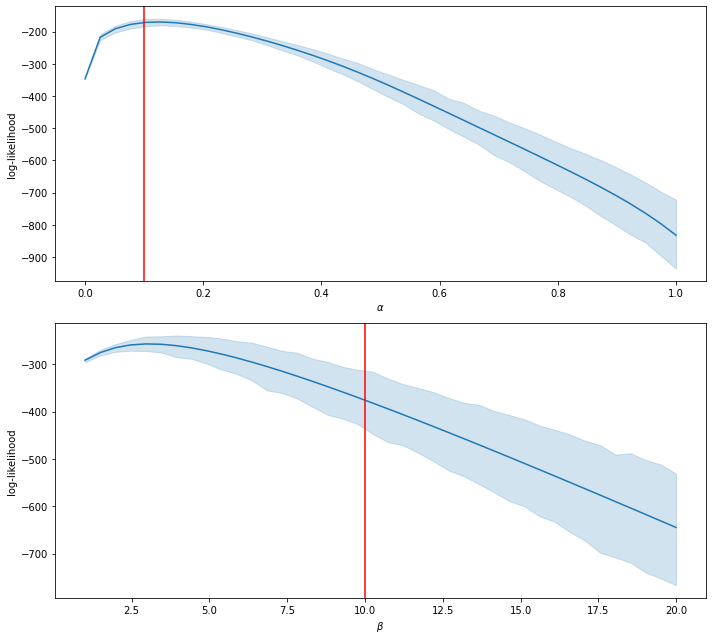

In [67]:
# Retrieve param names and values used for simulating
param_names = RW.param_labels
true_params = param_single

# Create figure and axes
fig, axes = plt.subplots(nrows=2, figsize=(10, 9))

# For each param...
for ax, param_name, param_value in zip(axes, param_names, true_params):
    
    # Plot the average likelihood against the parameter value
    sns.lineplot(data=data, x=param_name, y="log-likelihood", ax=ax)
    
    # Plot the ground truth
    ax.axvline(x=param_value, color='red')

plt.tight_layout()
plt.show()